In [1]:
import pandas as pd
import argparse
import random
import time
import os
import duckdb
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from crptmidfreq.config_loc import *
from crptmidfreq.featurelib.lib_v1 import *
from crptmidfreq.strats import *

plt.style.use('ggplot')


g_folder = 'res_exploration_v1'
g_reg = StepperRegistry()
clean_folder(g_folder)

/Users/sachadrevet/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-03-30 17:36:39 - Cleaning folder res_exploration_v1


In [2]:
featd=prepare_klines(start_date='2025-01-01',
                   end_date='2026-01-01',
                   tokens=['ETHUSDT'],
                   folder=g_folder,
                   name=None,
                   r=g_reg
                   )

2025-03-30 17:36:40 - Missing key=window_volume_wgt in cfg for kmeans_sret -- will use default value
2025-03-30 17:36:40 - prepare_klines start_date=2025-01-01 end_date=2026-01-01
2025-03-30 17:36:40 - Reading data from DuckDB
2025-03-30 17:36:40 - Stepper creating instance res_exploration_v1 None_cnt_exists
2025-03-30 17:36:43 - Stepper creating instance res_exploration_v1 None_close_diff1
2025-03-30 17:36:43 - Stepper creating instance res_exploration_v1 None_tret_clip
2025-03-30 17:36:44 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200
2025-03-30 17:36:44 - Stepper creating instance res_exploration_v1 None_turnover_ewm43200_qtl


In [3]:

featd, feats_log = perform_log(featd,
                                feats=['tret'],
                                folder=g_folder,
                                name=None,
                                r=g_reg)
featd, feats_px = perform_cumsum(featd,
                                    feats=feats_log,
                                    folder=g_folder,
                                    name=None,
                                    r=g_reg)
## adding a constant
for col in feats_px:
       featd[col]=1+featd[col]

featd,feats_sm = perform_ewm(featd,
                             feats=feats_px,
                             windows=[100],
                                    folder=g_folder,
                                    name=None,
                                    r=g_reg 
                                    )

featd,nfeats=perform_pfp(featd, 
                         feats=feats_sm,
                         nbrevs=[3], 
                         ticks=[100*1e-4], 
                         debug=False, 
                         folder=g_folder, 
                         name=None,
                         r=g_reg)



2025-03-30 17:36:44 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum
2025-03-30 17:36:44 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100
2025-03-30 17:36:44 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3
2025-03-30 17:36:48 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff
2025-03-30 17:36:48 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm50
2025-03-30 17:36:48 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm100
2025-03-30 17:36:48 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm500
2025-03-30 17:36:48 - Stepper creating instance res_exploration_v1 None_tret_log1_cumsum_ewm100_pfp0.01x3_dir_diff_ewm1000


In [4]:
perf_col = [x for x in featd.keys() if x.endswith('perf')][-1]
perf2_col = [x for x in featd.keys() if x.endswith('perf2')][-1]
dir_col = [x for x in featd.keys() if x.endswith('dir')][-1]
el_col = [x for x in featd.keys() if x.endswith('_el')][-1] # entry level
px_col = [x for x in featd.keys() if x.endswith('_px')][-1] # entry level
close_col=feats_sm[0]
print(perf_col)
print(dir_col)
print(el_col)
print(px_col)
print(close_col)

tret_log1_cumsum_ewm100_pfp0.01x3_perf
tret_log1_cumsum_ewm100_pfp0.01x3_dir
tret_log1_cumsum_ewm100_pfp0.01x3_el
tret_log1_cumsum_ewm100_pfp0.01x3_px
tret_log1_cumsum_ewm100


In [5]:
df=pd.DataFrame(featd)
df=df.set_index('close_time')
df=df.sort_index()

<Axes: xlabel='close_time'>

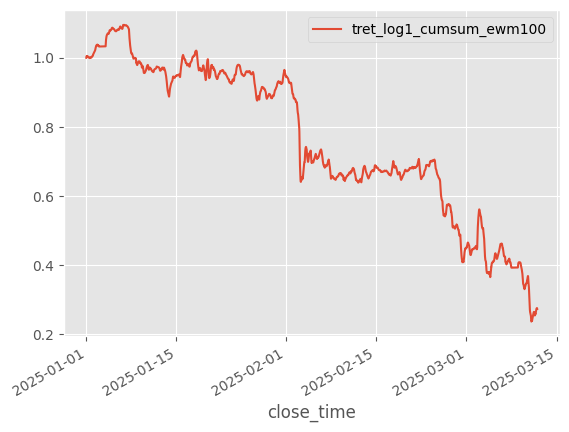

In [6]:
df[[close_col]].plot()

<Axes: title={'center': 'PFP example'}, xlabel='close_time'>

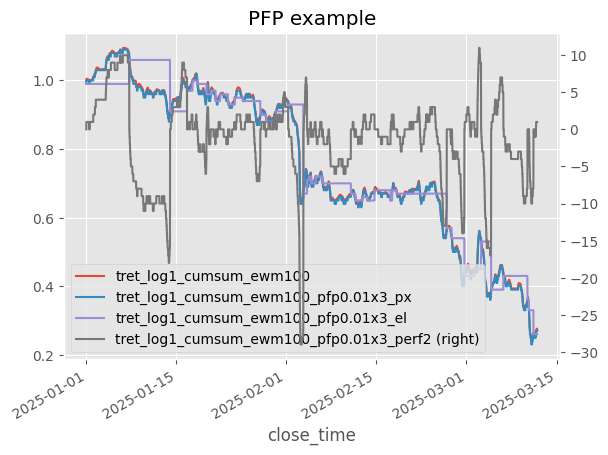

In [7]:
df[[close_col,px_col,el_col,perf2_col]]\
    .plot(title='PFP example',secondary_y=perf2_col)

<Axes: title={'center': 'PFP example'}, xlabel='close_time'>

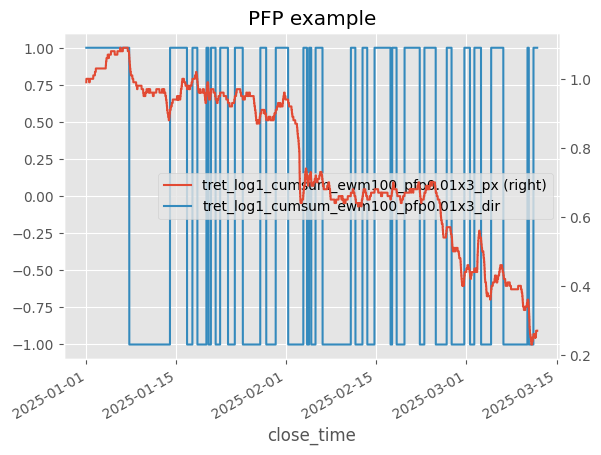

In [8]:
df[[px_col,dir_col]]\
    .plot(secondary_y=px_col,title='PFP example')